# Overfitting - regularization 
## L2 and L1 regularization for linear estimators

## Mateusz Lęcznar 

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston = load_boston()

/home/mateusz/Pliki_python/Pliki_python/envs/mateuszlecznar/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative data

In [2]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


In [3]:
#print(boston.DESCR);

In [4]:
X = boston.data
y = boston.target

## EX 1

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state = 15)

In [6]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


## EX 2

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)

In [8]:
# Creating an object 
regr = linear_model.LinearRegression()
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [-1.09995207e-01  5.48599840e-02  5.68201864e-02  3.70228596e+00
 -2.06890067e+01  3.44059127e+00  4.40875512e-03 -1.69803995e+00
  3.43836431e-01 -1.25266220e-02 -9.24497876e-01  1.04469000e-02
 -5.69768601e-01]


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

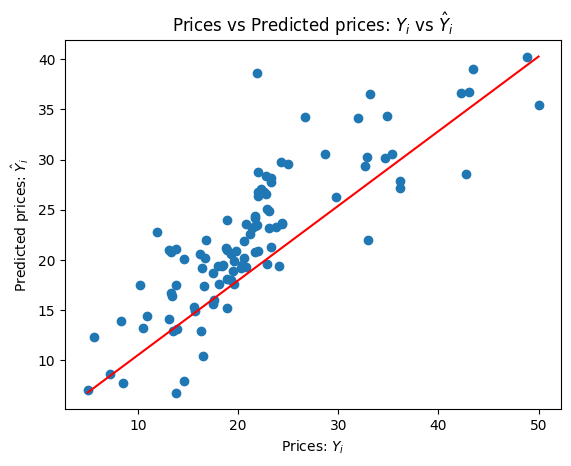

In [9]:
plt.scatter(Y_test, Y_predicted)
plt.plot([min(Y_test),max(Y_test)],[min(Y_predicted),max(Y_predicted)],color='red')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### ex3


In [10]:
mean_squared_error(Y_test, Y_predicted)

23.81224546508067

### ex4

In [11]:
#accuracy
regr.score(X,y)

0.7362839493766589

In [12]:
# Stanadrization 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures



In [13]:

polynomial_features= PolynomialFeatures(degree=2)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

X_train_norm_pol=polynomial_features.fit_transform(X_train_norm)
X_test_norm_pol = polynomial_features.fit_transform(X_test_norm)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

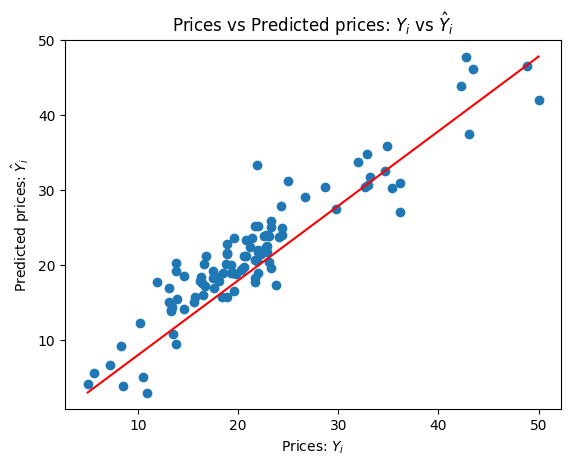

In [14]:
# Creating an object 
regr = linear_model.LinearRegression()
# Learning model on training data
regr.fit(X_train_norm_pol, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test_norm_pol)
#print("Coefficients: \n", regr.coef_)
plt.scatter(Y_test, Y_predicted)
plt.plot([min(Y_test),max(Y_test)],[min(Y_predicted),max(Y_predicted)],color='red')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [15]:
#MSE
mean_squared_error(Y_test, Y_predicted)

10.418718230374385

In [16]:
#accuracy
regr.score(X_train_norm_pol,Y_train)

0.9325110031499103

### Accurency is better than before normalize

### Ex 5

In [17]:
from sklearn.linear_model import Ridge, Lasso

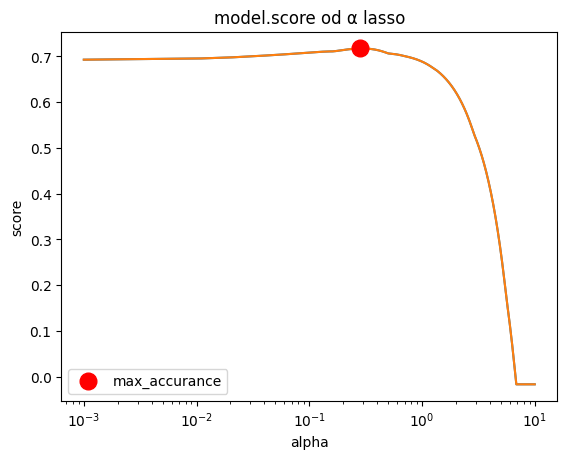

Best alpha:  0.28125225225225226 



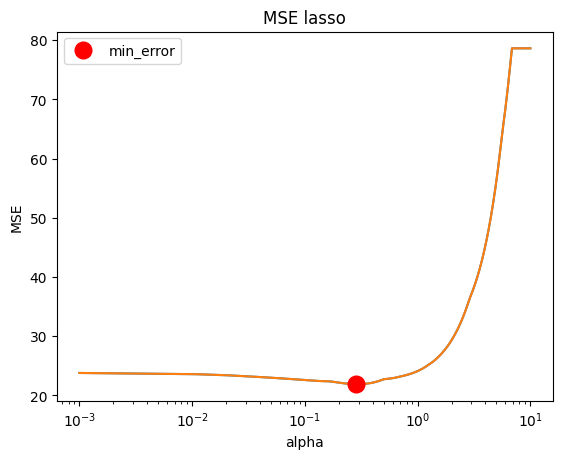

Best alpha:  0.28125225225225226 



In [18]:
import numpy as np
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state = 15)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test) 


alphas = np.linspace(0.001,10,1000)
# inicjalizacja listy sum wag
lasso_scores = []
lasso_MSE=[]
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_norm, Y_train)
    Y_predicted = lasso.predict(X_test_norm)
    lasso_MSE.append(sum(np.power(Y_predicted-Y_test,2))/(len(Y_predicted)))
    score = lasso.score(X_test_norm, Y_test)
    lasso_scores.append(score)
    
# rscore
plt.plot(alphas, lasso_scores)
plt.semilogx(alphas,lasso_scores)
min_idx = np.where(lasso_scores== np.max(lasso_scores))[0][0]
plt.plot(alphas[min_idx], lasso_scores[min_idx], 'ro',markersize=12,label='max_accurance')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('model.score od α lasso')
plt.show()
best_alpha=alphas[min_idx]
print("Best alpha: ",best_alpha,"\n")
#MSE
plt.figure()
plt.plot(alphas, lasso_MSE)
plt.semilogx(alphas,lasso_MSE)
min_idx = np.where(lasso_MSE== np.min(lasso_MSE))[0][0]
plt.plot(alphas[min_idx], lasso_MSE[min_idx], 'ro',markersize=12,label='min_error')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE lasso')
plt.show()
best_alpha=alphas[min_idx]
print("Best alpha: ",best_alpha,"\n")

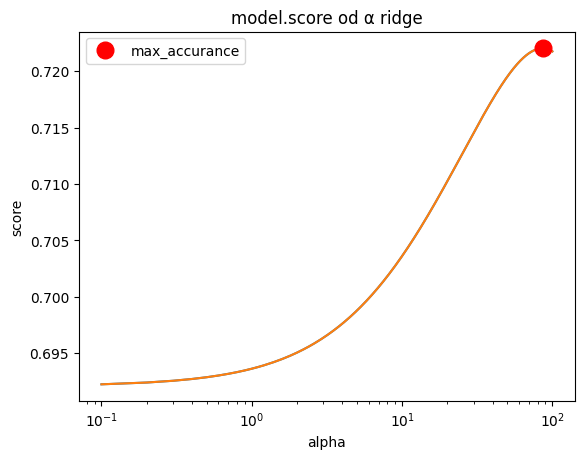

Best alpha:  86.0 



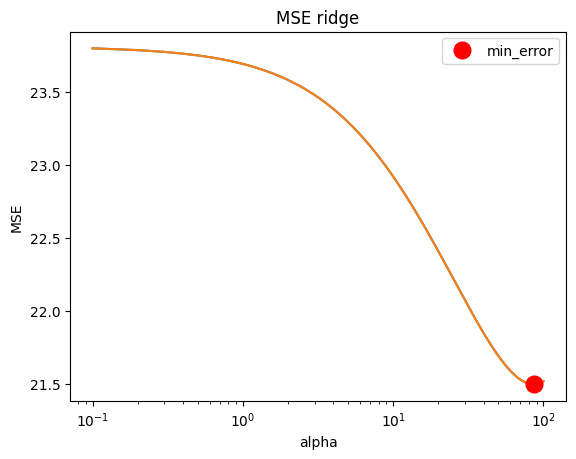

Best alpha:  86.0 



In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state = 15)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test) 


alphas = np.linspace(0.1,100,1000)
# inicjalizacja listy sum wag
ridge_scores = []
ridge_MSE=[]
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_norm, Y_train)
    Y_predicted = ridge.predict(X_test_norm)
    ridge_MSE.append(sum(np.power(Y_predicted-Y_test,2))/(len(Y_predicted)))
    score = ridge.score(X_test_norm, Y_test)
    ridge_scores.append(score)
    
# rscore
plt.plot(alphas,ridge_scores)
plt.semilogx(alphas,ridge_scores)
min_idx = np.where(ridge_scores== np.max(ridge_scores))[0][0]
plt.plot(alphas[min_idx], ridge_scores[min_idx], 'ro',markersize=12,label='max_accurance')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('model.score od α ridge')
plt.show()
best_alpha=alphas[min_idx]
print("Best alpha: ",best_alpha,"\n")
#MSE
plt.figure()
plt.plot(alphas, ridge_MSE)
plt.semilogx(alphas,ridge_MSE)
min_idx = np.where(ridge_MSE== np.min(ridge_MSE))[0][0]
plt.plot(alphas[min_idx], ridge_MSE[min_idx], 'ro',markersize=12,label='min_error')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE ridge')
plt.show()
best_alpha=alphas[min_idx]
print("Best alpha: ",best_alpha,"\n")

### Regularization for Logistic Regression

/home/mateusz/Pliki_python/Pliki_python/envs/mateuszlecznar/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


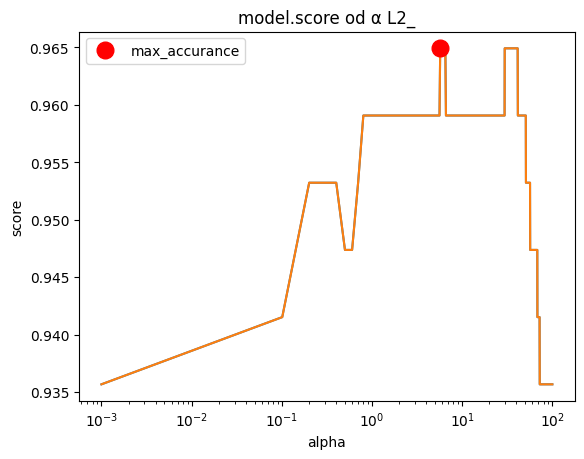

Best alpha:  5.706648648648649 



In [21]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
from sklearn.linear_model import LogisticRegression
y = data.target
X = data.data

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state = 15)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test) 


alphas = np.linspace(0.001,100,1000)
# inicjalizacja listy sum wag
L2_scores = []

for a in alphas:
    L2_ = LogisticRegression(penalty='l2',C=1/a)
    L2_.fit(X_train_norm, Y_train)
    Y_predicted = L2_.predict(X_test_norm)
    score = L2_.score(X_test_norm, Y_test)
    L2_scores.append(score)
    
plt.plot(alphas,L2_scores )
plt.semilogx(alphas,L2_scores )
min_idx = np.where(L2_scores == np.max(L2_scores ))[0][0]
plt.plot(alphas[min_idx], L2_scores [min_idx], 'ro',markersize=12,label='max_accurance')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('model.score od α L2_')
plt.show()
best_alpha=alphas[min_idx]
print("Best alpha: ",best_alpha,"\n")


### The best alpha (C parametr reversed) for this model is 5.70.